# IMPORT

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading CSV & Data exploration

In [7]:
df = pd.read_csv("csv_files\\regularite-mensuelle-tgv-aqst.csv",sep=";")

In [8]:
print("--------------Data Head--------------")
#print(df.head())
print("\n")
print("--------------Data Description--------------")
#print(df.describe())
print("\n")
print("--------------Data Types--------------")
print(df.dtypes)
print("\n")


--------------Data Head--------------


--------------Data Description--------------


--------------Data Types--------------
date                                     object
service                                  object
gare_depart                              object
gare_arrivee                             object
duree_moyenne                             int64
nb_train_prevu                            int64
nb_annulation                             int64
commentaire_annulation                  float64
nb_train_depart_retard                    int64
retard_moyen_depart                     float64
retard_moyen_tous_trains_depart         float64
commentaire_retards_depart              float64
nb_train_retard_arrivee                   int64
retard_moyen_arrivee                    float64
retard_moyen_tous_trains_arrivee        float64
commentaires_retard_arrivee              object
nb_train_retard_sup_15                    int64
retard_moyen_trains_retard_sup15        float64
nb_train_r

In [9]:
print("--------------Identification missing values --------------")
print(df.isnull().sum())

--------------Identification missing values --------------
date                                       0
service                                    0
gare_depart                                0
gare_arrivee                               0
duree_moyenne                              0
nb_train_prevu                             0
nb_annulation                              0
commentaire_annulation                  8154
nb_train_depart_retard                     0
retard_moyen_depart                        0
retard_moyen_tous_trains_depart            0
commentaire_retards_depart              8154
nb_train_retard_arrivee                    0
retard_moyen_arrivee                       0
retard_moyen_tous_trains_arrivee           0
commentaires_retard_arrivee             7456
nb_train_retard_sup_15                     0
retard_moyen_trains_retard_sup15           0
nb_train_retard_sup_30                     0
nb_train_retard_sup_60                     0
prct_cause_externe                       

### Dropna or fillna ? / handle duplicates if there any ? 

In [10]:
#df = df.dropna()  
# OR
#df = df.fillna("value")  
#& OR 
#df = df.drop_duplicates()

In [11]:
df['date'] = pd.to_datetime(df['date'])

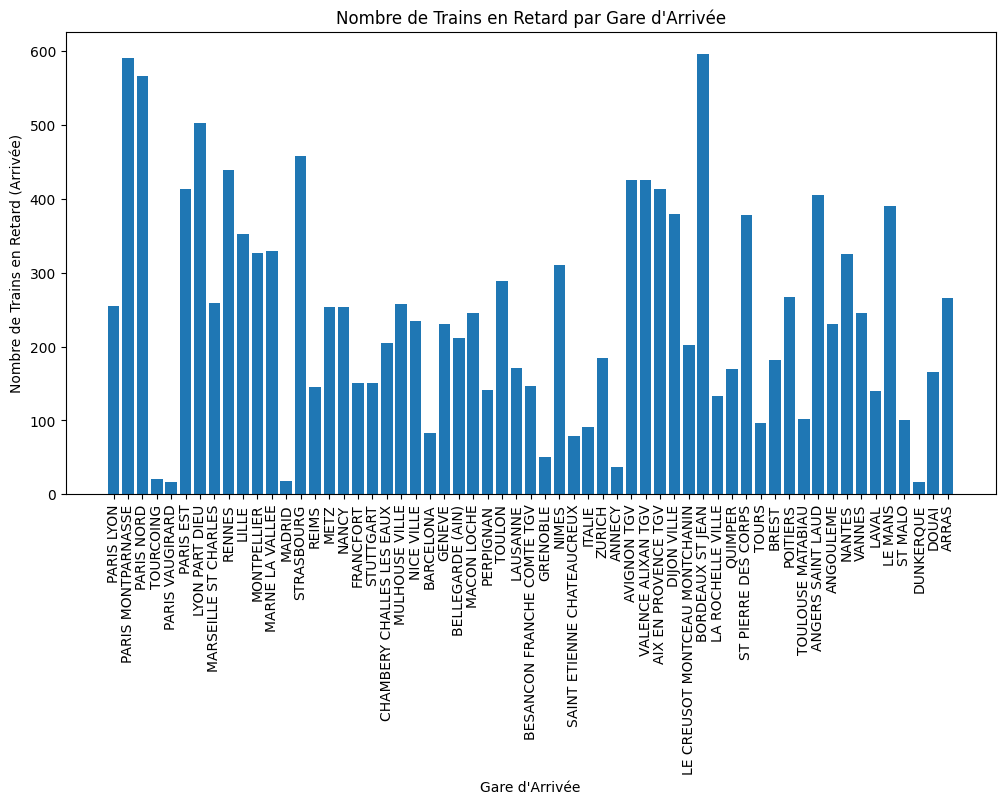

In [12]:


xpoints = df['gare_depart']
ypoints = df['nb_train_depart_retard']

plt.figure(figsize=(12, 6))  # Facultatif : définir la taille du graphique
plt.bar(xpoints, ypoints)  # Utiliser bar pour un graphique en barres
plt.xlabel('Gare d\'Arrivée')
plt.ylabel('Nombre de Trains en Retard (Arrivée)')
plt.title('Nombre de Trains en Retard par Gare d\'Arrivée')
plt.xticks(rotation=90)  # Pour faire pivoter les étiquettes de l'axe x (facultatif si les noms sont longs)

plt.show()






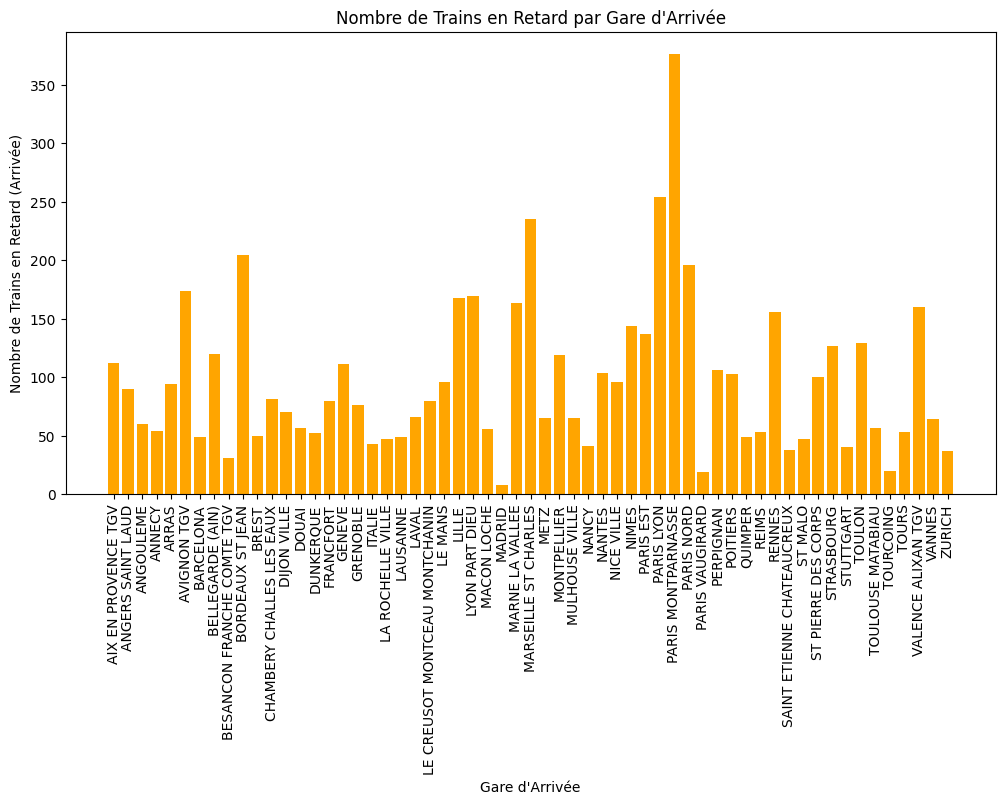

In [13]:
xpoints = df['gare_arrivee']
ypoints = df['nb_train_retard_arrivee']

plt.figure(figsize=(12, 6))  # Facultatif : définir la taille du graphique
plt.bar(xpoints, ypoints, color='orange')  # Utiliser bar pour un graphique en barres
plt.xlabel('Gare d\'Arrivée')
plt.ylabel('Nombre de Trains en Retard (Arrivée)')
plt.title('Nombre de Trains en Retard par Gare d\'Arrivée')
plt.xticks(rotation=90)  # Pour faire pivoter les étiquettes de l'axe x (facultatif si les noms sont longs)

plt.show()


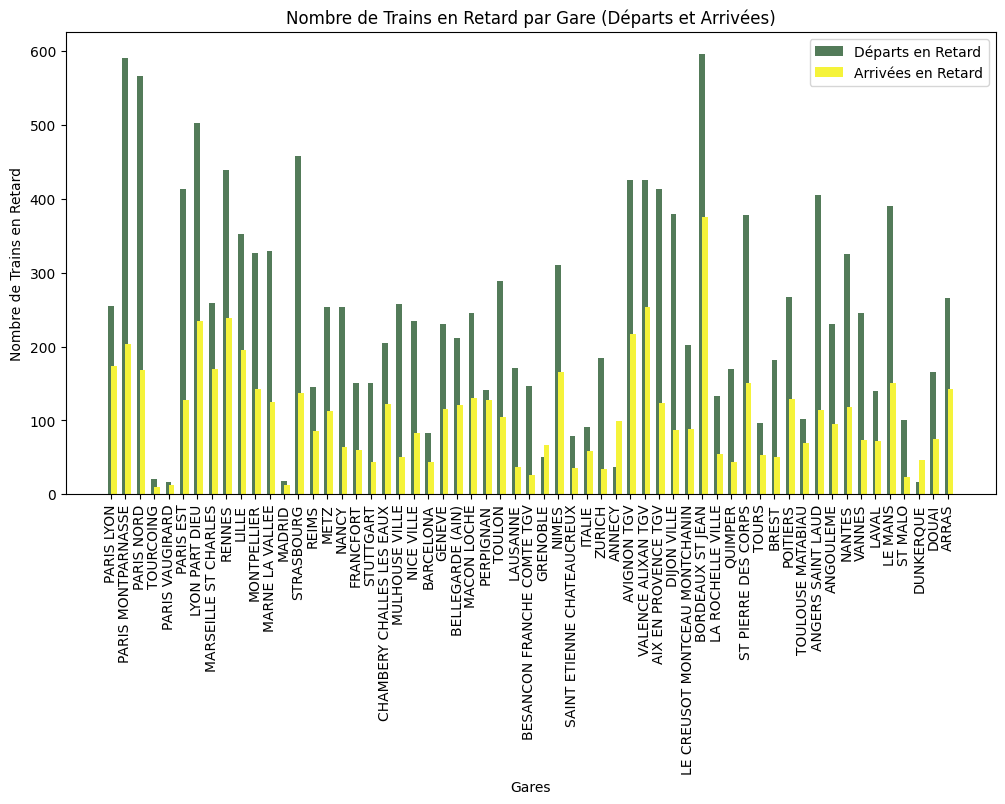

In [14]:
gares = df['gare_depart'] 

x = gares
width = 0.4  # Largeur des barres

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x, df['nb_train_depart_retard'], width=width, label='Départs en Retard',color='#537B59')
bars2 = plt.bar(x, df['nb_train_retard_arrivee'], width=width, label='Arrivées en Retard', align='edge',color='#F5F33A')

plt.xlabel('Gares')
plt.xticks(rotation=90)
plt.ylabel('Nombre de Trains en Retard')
plt.title('Nombre de Trains en Retard par Gare (Départs et Arrivées)')

plt.legend()

plt.show()

Nous remarquons que pour nos trajets, nous avons une majorité de retards au départ et moins pour retard à l'arrivé. 
Nous pouvons alors supposer que les trains dans la majorité réussissent à rattraper leur retard durant leur trajet. 

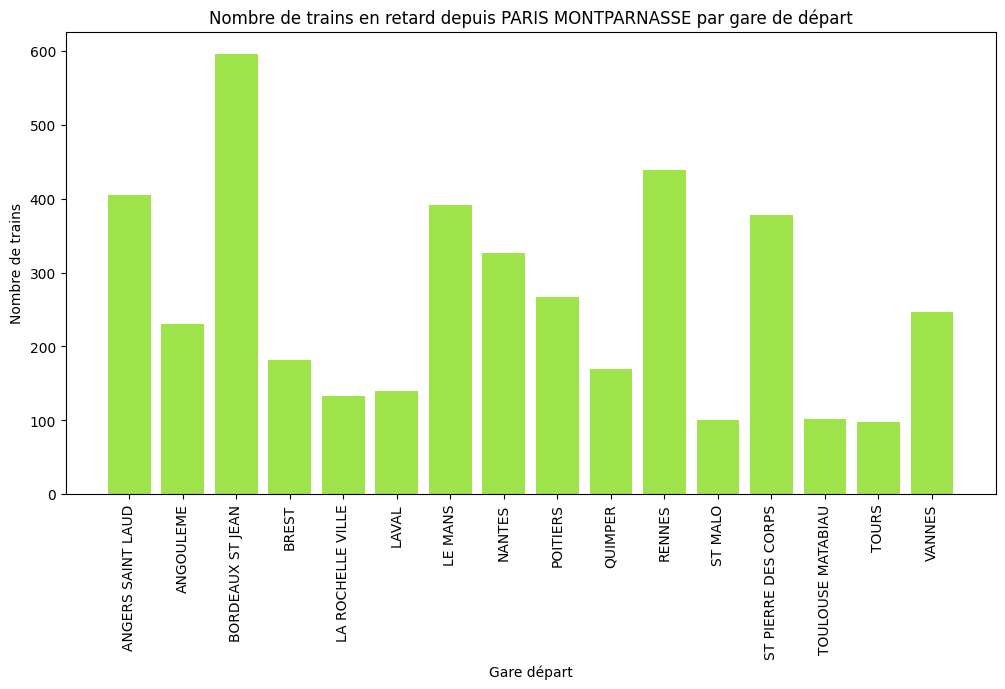

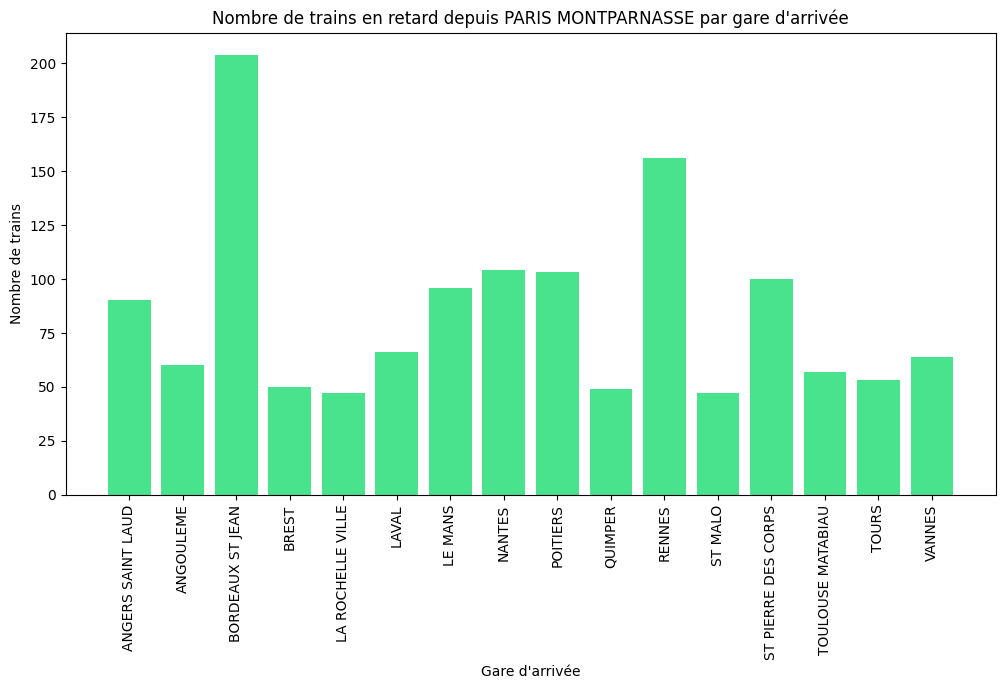

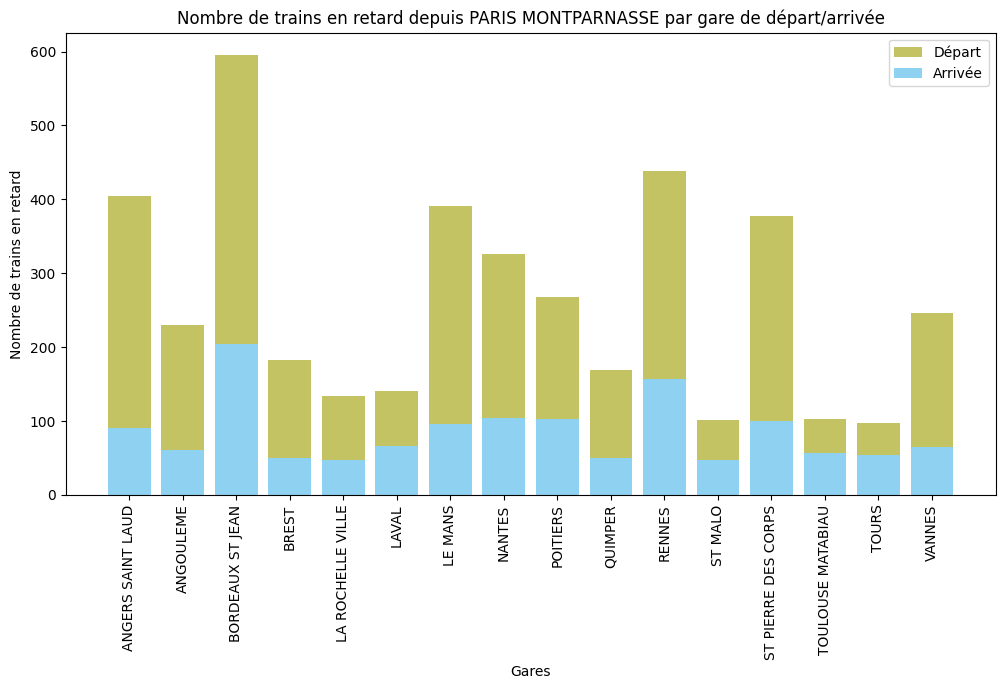

In [15]:
paris_montparnasse_data_depart = df[df['gare_arrivee'] == 'PARIS MONTPARNASSE']
paris_montparnasse_data_depart = paris_montparnasse_data_depart.sort_values(by='gare_depart')

# Créez un graphique en fonction de la gare d'arrivée et de nb_annulation
plt.figure(figsize=(12, 6))
plt.bar(paris_montparnasse_data_depart['gare_depart'], paris_montparnasse_data_depart['nb_train_depart_retard'], color='#9FE34A')
plt.xlabel('Gare départ')
plt.ylabel('Nombre de trains')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Nombre de trains en retard depuis PARIS MONTPARNASSE par gare de départ')
plt.show()

###########################################################################################################

paris_montparnasse_data_arrivee = df[df['gare_depart'] == 'PARIS MONTPARNASSE']
paris_montparnasse_data_arrivee = paris_montparnasse_data_arrivee.sort_values(by='gare_arrivee')

# Créez un graphique en fonction de la gare d'arrivée et de nb_annulation
plt.figure(figsize=(12, 6))
plt.bar(paris_montparnasse_data_arrivee['gare_arrivee'], paris_montparnasse_data_arrivee['nb_train_retard_arrivee'],color='#4AE38D')
plt.xlabel('Gare d\'arrivée')
plt.ylabel('Nombre de trains')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Nombre de trains en retard depuis PARIS MONTPARNASSE par gare d\'arrivée')
plt.show()


####################################################################################################

# Filtrez les données pour Paris Montparnasse (départ et arrivée)
paris_montparnasse_data_depart = df[df['gare_arrivee'] == 'PARIS MONTPARNASSE']
paris_montparnasse_data_arrivee = df[df['gare_depart'] == 'PARIS MONTPARNASSE']

# Triez les données pour les deux cas
paris_montparnasse_data_depart = paris_montparnasse_data_depart.sort_values(by='gare_depart')
paris_montparnasse_data_arrivee = paris_montparnasse_data_arrivee.sort_values(by='gare_arrivee')

# Créez un graphique
plt.figure(figsize=(12, 6))

# Affichez les données de départ en bleu
plt.bar(paris_montparnasse_data_depart['gare_depart'], paris_montparnasse_data_depart['nb_train_depart_retard'], color='#C4C364', label='Départ')

# Affichez les données d'arrivée en vert
plt.bar(paris_montparnasse_data_arrivee['gare_arrivee'], paris_montparnasse_data_arrivee['nb_train_retard_arrivee'], color='#8FD1F0', label='Arrivée')

plt.xlabel('Gares')
plt.ylabel('Nombre de trains en retard')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Nombre de trains en retard depuis PARIS MONTPARNASSE par gare de départ/arrivée')
plt.legend()  # Ajoutez une légende pour différencier les données de départ et d'arrivée

plt.show()






6       •panne du 5180, problème de disjonction, à Aix...
7       •problème de traction du 9582 vers Aix-en-Prov...
8       Accident de personne à chevry, restitution tar...
9       2 accidents de personne, 2 LTV impactantes Lap...
12                  Neiges et Inondation tunnel Marseille
                              ...                        
8023    Ce mois-ci, l'OD a été touchée par les inciden...
8024    Ce mois-ci, l'OD a été touchée par les inciden...
8029    Ce mois-ci, l'OD a été touchée par 2 journées ...
8035    Ce mois-ci, l'OD a été touchée par les inciden...
8040    Ce mois ci, la destination a été marquée par l...
Name: commentaires_retard_arrivee, Length: 698, dtype: object


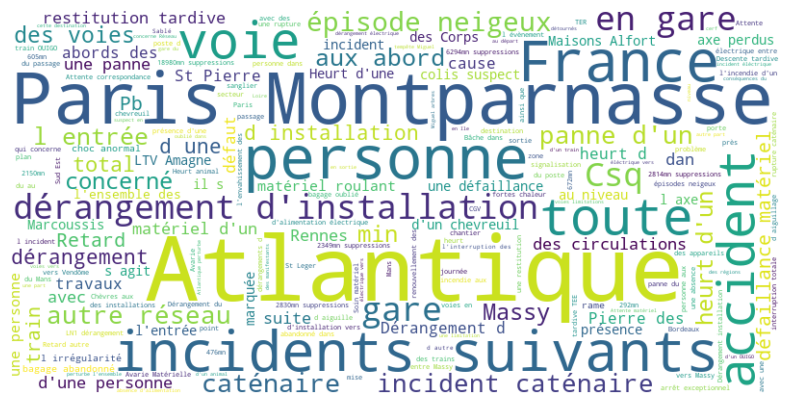

In [16]:
from wordcloud import WordCloud, STOPWORDS

commentaires_retard_arrivee = df['commentaires_retard_arrivee']
commentaires_retard_arrivee = commentaires_retard_arrivee.dropna()  
print(commentaires_retard_arrivee)
# Concaténez tous les commentaires en une seule chaîne de texte
texte = " ".join(commentaires_retard_arrivee)
stop_words = ["pour", "la", "sur", "le","un","à","les","de","grande vitesse","minutes perdues","TGV retardé"
              ,"Ce","mois","-","ci","l'OD", "a", "été","touchée","par","minutes","vitesse","TGV","impacté","impactés","perdues",
              "grande","ligne","perdues","et","retardés"] + list(STOPWORDS)
# Créez un objet WordCloud
wordcloud = WordCloud(stopwords = stop_words,width=800, height=400, background_color='white').generate(texte)

# Affichez le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()





In [17]:
noms_gares_arrivee = df['gare_arrivee'].unique()
noms_gares_départ =  df['gare_depart'].unique()


print("                 |=== LISTE DES ",len(noms_gares_départ)," GARES ===|")
print(noms_gares_départ)
print(len(noms_gares_départ))

                 |=== LISTE DES  59  GARES ===|
['PARIS LYON' 'PARIS MONTPARNASSE' 'PARIS NORD' 'TOURCOING'
 'PARIS VAUGIRARD' 'PARIS EST' 'LYON PART DIEU' 'MARSEILLE ST CHARLES'
 'RENNES' 'LILLE' 'MONTPELLIER' 'MARNE LA VALLEE' 'MADRID' 'STRASBOURG'
 'REIMS' 'METZ' 'NANCY' 'FRANCFORT' 'STUTTGART'
 'CHAMBERY CHALLES LES EAUX' 'MULHOUSE VILLE' 'NICE VILLE' 'BARCELONA'
 'GENEVE' 'BELLEGARDE (AIN)' 'MACON LOCHE' 'PERPIGNAN' 'TOULON' 'LAUSANNE'
 'BESANCON FRANCHE COMTE TGV' 'GRENOBLE' 'NIMES'
 'SAINT ETIENNE CHATEAUCREUX' 'ITALIE' 'ZURICH' 'ANNECY' 'AVIGNON TGV'
 'VALENCE ALIXAN TGV' 'AIX EN PROVENCE TGV' 'DIJON VILLE'
 'LE CREUSOT MONTCEAU MONTCHANIN' 'BORDEAUX ST JEAN' 'LA ROCHELLE VILLE'
 'QUIMPER' 'ST PIERRE DES CORPS' 'TOURS' 'BREST' 'POITIERS'
 'TOULOUSE MATABIAU' 'ANGERS SAINT LAUD' 'ANGOULEME' 'NANTES' 'VANNES'
 'LAVAL' 'LE MANS' 'ST MALO' 'DUNKERQUE' 'DOUAI' 'ARRAS']
59


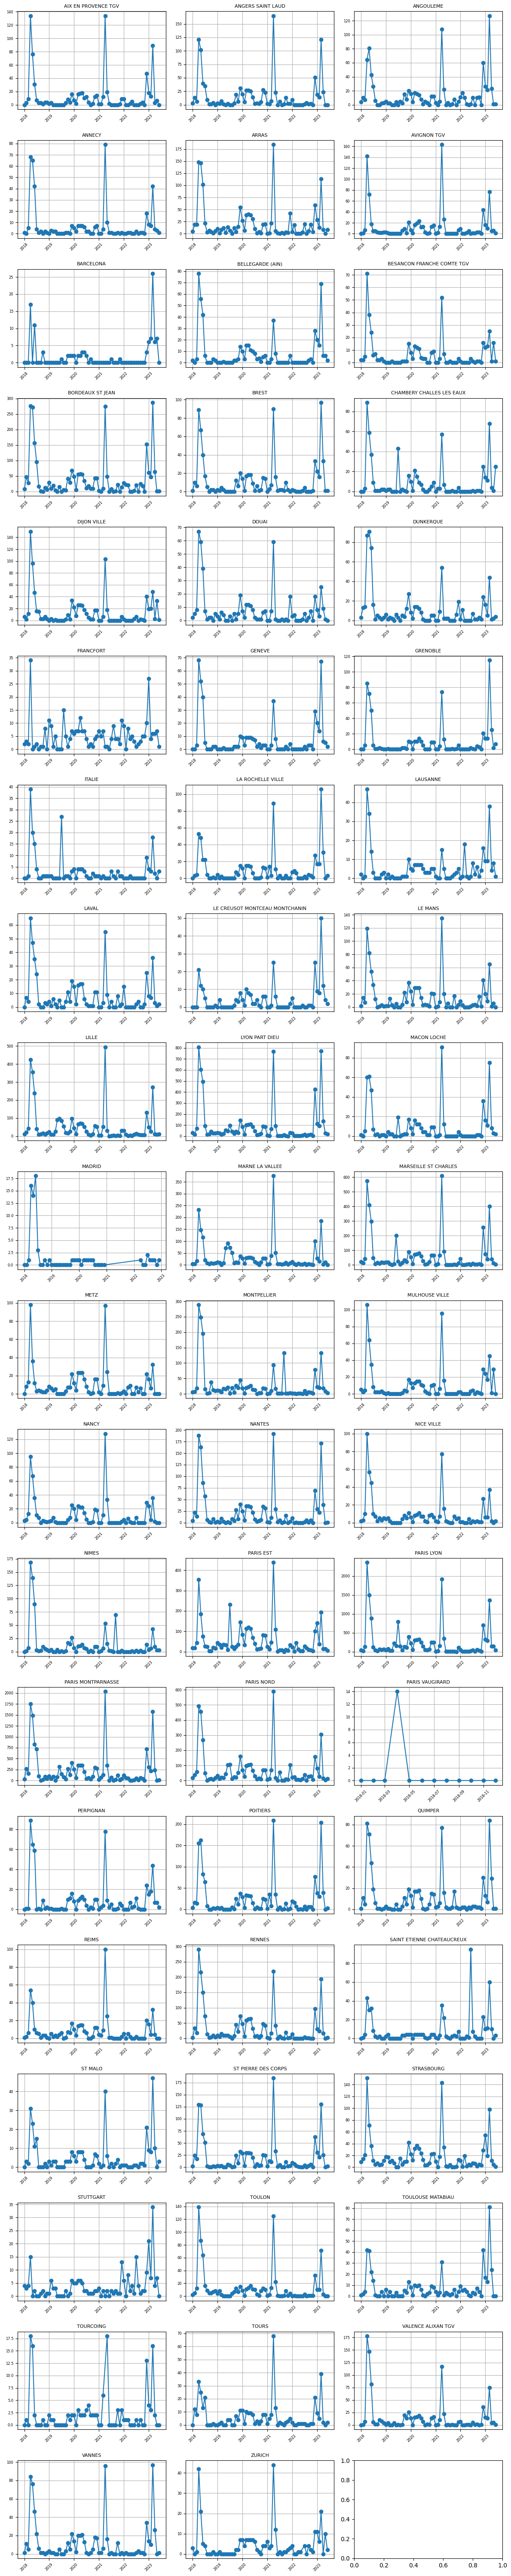

In [18]:
destinations = df['gare_arrivee'].unique()


fig, axes = plt.subplots(20, 3, figsize=(12,60))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, destination in enumerate(destinations):
    # Filtrez les données pour la destination actuelle
    data_destination = df[df['gare_arrivee'] == destination]
    
    # Groupez les données par année et calculez le nombre total d'annulations par année
    annulations_par_an = data_destination.groupby('date')['nb_annulation'].sum()
    
    row = i // 3
    col = i % 3
    
    axes[row, col].plot(annulations_par_an.index, annulations_par_an.values, marker='o')
    axes[row, col].set_title(destination, fontsize=8)  
    axes[row, col].set_xlabel('', fontsize=8)  
    axes[row, col].set_ylabel('', fontsize=8) 
    axes[row, col].tick_params(axis='x', labelsize=6)  
    axes[row, col].tick_params(axis='y', labelsize=6) 
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()








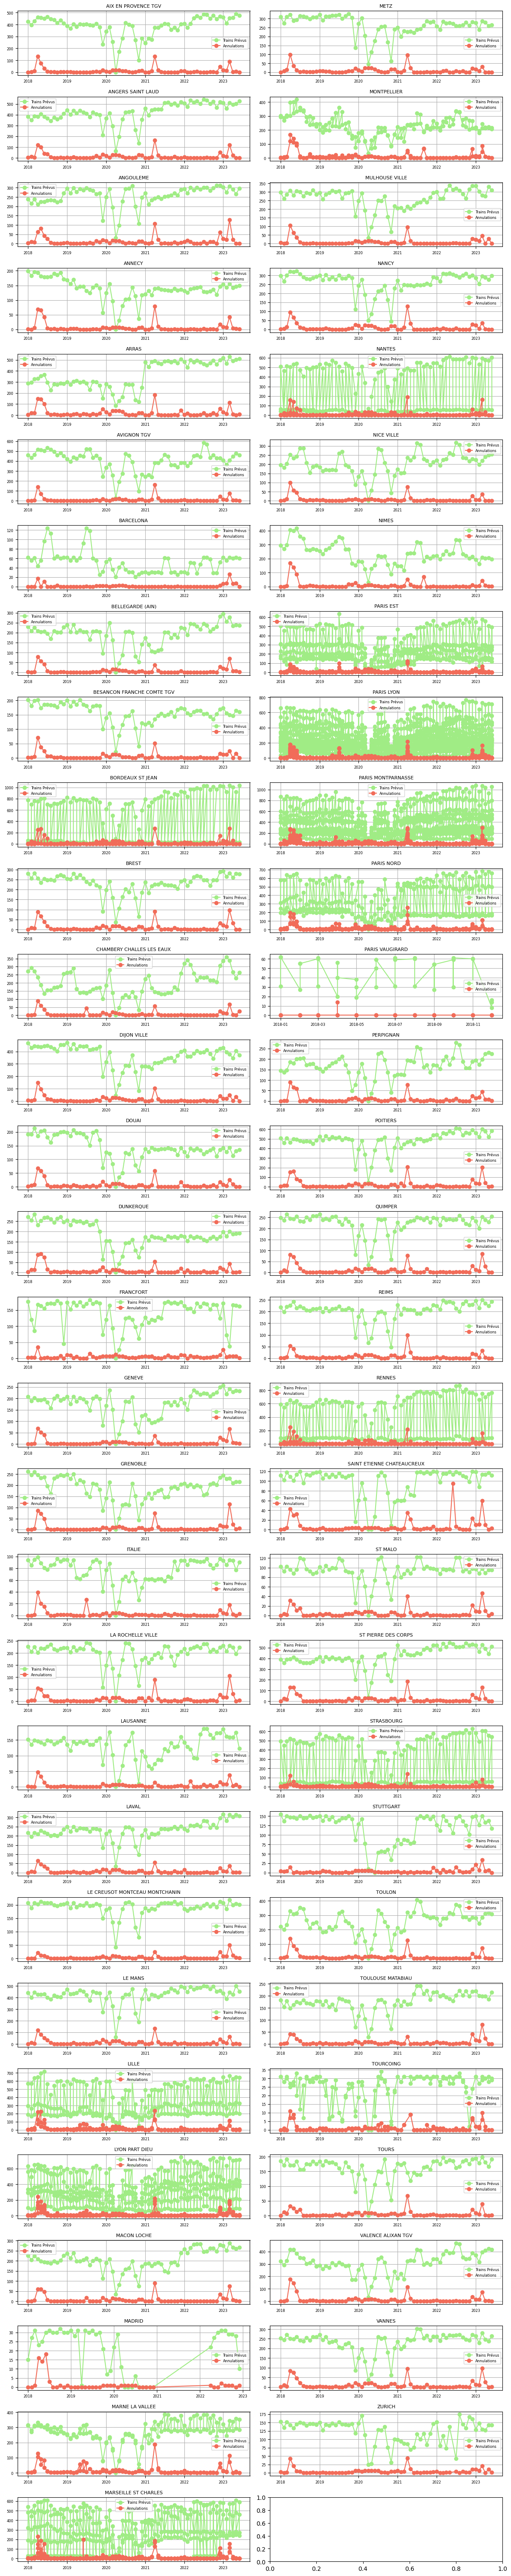

In [19]:
destinations = df['gare_arrivee'].unique()
fig, axes = plt.subplots(30, 2, figsize=(12, 60))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, destination in enumerate(destinations):
    data_destination_arrivee = df[df['gare_arrivee'] == destination]
    
    nb_trains_prevus = data_destination_arrivee['nb_train_prevu']
    nb_annulations = data_destination_arrivee['nb_annulation']
    
    row = i % 30
    col = i // 30
    
    axes[row, col].plot(data_destination_arrivee['date'], nb_trains_prevus, marker='o', label='Trains Prévus', color='#A0EC85')
    axes[row, col].plot(data_destination_arrivee['date'], nb_annulations, marker='o', label='Annulations', color='#F16C59')
    axes[row, col].set_title(destination, fontsize=8)  
    axes[row, col].tick_params(axis='x', labelsize=6) 
    axes[row, col].tick_params(axis='y', labelsize=6) 
    axes[row, col].grid(True)
    axes[row, col].legend(fontsize=6) 

plt.tight_layout()
plt.show()






In [20]:
"""destinations = df['gare_arrivee'].unique()
fig, axes = plt.subplots(30, 2, figsize=(12, 60))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, destination in enumerate(destinations):
    data_destination_arrivee = df[df['gare_arrivee'] == destination]
    
    nb_trains_prevus = data_destination_arrivee['nb_train_prevu']
    nb_annulations = data_destination_arrivee['nb_annulation']


    prct_cause_externe = data_destination_arrivee['prct_cause_externe']
    prct_cause_infra = data_destination_arrivee['prct_cause_infra']
    prct_cause_gestion_trafic = data_destination_arrivee['prct_cause_gestion_trafic']
    prct_cause_materiel_roulant = data_destination_arrivee['prct_cause_materiel_roulant']
    prct_cause_gestion_gare = data_destination_arrivee['prct_cause_gestion_gare']
    prct_cause_prise_en_charge_voyageurs =data_destination_arrivee['prct_cause_prise_en_charge_voyageurs']
    
    row = i % 30
    col = i // 30
    
    axes[row, col].plot(data_destination_arrivee['date'], prct_cause_externe, marker='+', label='prct_cause_externe', color='#DE9489')
    axes[row, col].plot(data_destination_arrivee['date'], prct_cause_infra, marker='+', label='prct_cause_infra', color='#DEDD89')
    axes[row, col].plot(data_destination_arrivee['date'], prct_cause_gestion_trafic, marker='+', label='prct_cause_gestion_trafic', color='#97DE89')
    axes[row, col].plot(data_destination_arrivee['date'], prct_cause_materiel_roulant, marker='+', label='prct_cause_materiel_roulant', color='#89DECB')
    axes[row, col].plot(data_destination_arrivee['date'], prct_cause_gestion_gare, marker='+', label='prct_cause_gestion_gare', color='#899FDE')
    axes[row, col].plot(data_destination_arrivee['date'], prct_cause_prise_en_charge_voyageurs, marker='+', label='prct_cause_prise_en_charge_voyageurs', color='#DD89DE')

    axes[row, col].set_title(destination, fontsize=8)  
    axes[row, col].tick_params(axis='x', labelsize=6) 
    axes[row, col].tick_params(axis='y', labelsize=6) 
    axes[row, col].grid(True)
    axes[row, col].legend(fontsize=6) 

plt.tight_layout()
plt.show()"""

"destinations = df['gare_arrivee'].unique()\nfig, axes = plt.subplots(30, 2, figsize=(12, 60))\nfig.subplots_adjust(wspace=0.5, hspace=0.5)\n\nfor i, destination in enumerate(destinations):\n    data_destination_arrivee = df[df['gare_arrivee'] == destination]\n    \n    nb_trains_prevus = data_destination_arrivee['nb_train_prevu']\n    nb_annulations = data_destination_arrivee['nb_annulation']\n\n\n    prct_cause_externe = data_destination_arrivee['prct_cause_externe']\n    prct_cause_infra = data_destination_arrivee['prct_cause_infra']\n    prct_cause_gestion_trafic = data_destination_arrivee['prct_cause_gestion_trafic']\n    prct_cause_materiel_roulant = data_destination_arrivee['prct_cause_materiel_roulant']\n    prct_cause_gestion_gare = data_destination_arrivee['prct_cause_gestion_gare']\n    prct_cause_prise_en_charge_voyageurs =data_destination_arrivee['prct_cause_prise_en_charge_voyageurs']\n    \n    row = i % 30\n    col = i // 30\n    \n    axes[row, col].plot(data_destinati

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

# Create a dropdown widget for selecting the destination
destination_dropdown = widgets.Dropdown(
    options=df['gare_arrivee'].unique(),
    description='Select Destination:',
    disabled=False,
)

# Function to plot the selected destination
def plot_destination(destination):
    data_destination_arrivee = df[df['gare_arrivee'] == destination]

    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Plot the data with labels
    ax.plot(data_destination_arrivee['date'], data_destination_arrivee['prct_cause_externe'], marker='+', label='prct_cause_externe', color='#DE9489')
    ax.plot(data_destination_arrivee['date'], data_destination_arrivee['prct_cause_infra'], marker='+', label='prct_cause_infra', color='#DEDD89')
    ax.plot(data_destination_arrivee['date'], data_destination_arrivee['prct_cause_gestion_trafic'], marker='+', label='prct_cause_gestion_trafic', color='#97DE89')
    ax.plot(data_destination_arrivee['date'], data_destination_arrivee['prct_cause_materiel_roulant'], marker='+', label='prct_cause_materiel_roulant', color='#89DECB')
    ax.plot(data_destination_arrivee['date'], data_destination_arrivee['prct_cause_gestion_gare'], marker='+', label='prct_cause_gestion_gare', color='#899FDE')
    ax.plot(data_destination_arrivee['date'], data_destination_arrivee['prct_cause_prise_en_charge_voyageurs'], marker='+', label='prct_cause_prise_en_charge_voyageurs', color='#DD89DE')

    ax.set_title(destination, fontsize=10)  
    ax.set_xlabel('Date', fontsize=8) 
    ax.set_ylabel('Pourcentage (%)', fontsize=8)
    ax.tick_params(axis='x', labelsize=8) 
    ax.tick_params(axis='y', labelsize=8) 
    ax.grid(True)

    # Add a legend
    ax.legend(fontsize="xx-small",loc="upper right")
    plt.tight_layout()
    plt.show()

# Interactive widget to choose a destination and see the corresponding plot
interactive_plot = interactive(plot_destination, destination=destination_dropdown)
output = interactive_plot.children[-1]
output.layout.height = '400px'

# Display the widget
display(interactive_plot)


interactive(children=(Dropdown(description='Select Destination:', options=('AIX EN PROVENCE TGV', 'ANGERS SAIN…